# Substrate.py tutorial jupyter nb

## Goals:
1. To go through key functions in the substrate.py scrips

In [1]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis/notebooks'

In [2]:
cd ..

/Users/mariaalonso/Work/protease_activity_analysis


In [3]:
#Import packages
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as ss
import csv
import pickle
import protease_activity_analysis as paa


In [4]:
# First run this to have access to have a sample instance of the database class that contains example files to test functions with
data_files = ['data/screens/PAA/PAA_screens/Bhatia1_PAA.csv', 'data/screens/PAA/PAA_screens/Bhatia2_PAA.csv']
sequence_file = 'data/screens/PAA/Peptide_Inventory_150.csv'
names_file = 'data/screens/PAA/names_dict.pkl'
aa_dict_file = 'data/screens/PAA/kmer_analyses/aa_dict.pkl'

data = paa.database.SubstrateDatabase(data_files, sequence_file, names_file, aa_dict_file = 'data/screens/PAA/kmer_analyses/aa_dict.pkl')

In [5]:
# color_seq()
# Will use sample sequences in 'Sequence' column to test color_seq()
display(data.database)

# Will use sample color dictionary from database intance to test color_seq(), colors are encoded as values as ANSI escape sequences and keys correspond to one-letter AA
print(data.aa_dict)

# Display color-coded sequences for all natural AA in the database 
# Note that color-coding does not work on non-natural AA, hence these are returned as a regular print statement
print('\nSample output:\n')
for i in np.arange(data.database.shape[0]):
    sub = data.database.iloc[i]['Sequence']
    all_nat = data.database.iloc[i]['Composition'] == 'Natural'
    color_sub = paa.substrate.color_seq(sub, all_nat, data.aa_dict)
    print(color_sub)

,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
0,S1,GRQRRVVGG,Natural,NaN,NaN,LQ1,NaN,NaN,"[nan, nan, LQ1, nan, nan]"
1,S2,GRQARAVGG,Natural,NaN,NaN,LQ2,NaN,NaN,"[nan, nan, LQ2, nan, nan]"
2,S3,GRRARVVGG,Natural,NaN,NaN,LQ3,NaN,NaN,"[nan, nan, LQ3, nan, nan]"
3,S4,GPLGLRSWG,Natural,PP04,Q6,LQ4,NaN,TQ6,"[PP04, Q6, LQ4, nan, TQ6]"
4,S5,GWEAVRSAMWG,Natural,NaN,NaN,LQ5,NaN,NaN,"[nan, nan, LQ5, nan, nan]"
...,...,...,...,...,...,...,...,...,...
145,S146,GGPRAAA[Phe(homo)]TSPG,Non-natural,NaN,NaN,NaN,BV13,NaN,"[nan, nan, nan, BV13, nan]"
146,S147,GGTGPPGYTG,Natural,NaN,NaN,NaN,BV14,NaN,"[nan, nan, nan, BV14, nan]"
147,S148,GGTGLPVYQG,Natural,NaN,NaN,NaN,BV15,NaN,"[nan, nan, nan, BV15, nan]"
148,S149,GG[Nle(O-Bzl)][Met(O)2][Oic][Abu],Non-natural,NaN,NaN,NaN,BV16,NaN,"[nan, nan, nan, BV16, nan]"


{'D': '\x1b\x1b\x1bD', 'd': '\x1b\x1b\x1bd', 'E': '\x1b\x1b\x1bE', 'e': '\x1b\x1b\x1be', 'C': '\x1b\x1b\x1bC', 'c': '\x1b\x1b\x1bc', 'M': '\x1b\x1b\x1bM', 'm': '\x1b\x1b\x1bm', 'K': '\x1b\x1b\x1bK', 'k': '\x1b\x1b\x1bk', 'R': '\x1b\x1b\x1bR', 'r': '\x1b\x1b\x1br', 'S': '\x1b\x1b\x1bS', 's': '\x1b\x1b\x1bs', 'T': '\x1b\x1b\x1bT', 't': '\x1b\x1b\x1bt', 'F': '\x1b\x1b\x1bF', 'f': '\x1b\x1b\x1bf', 'Y': '\x1b\x1b\x1bY', 'y': '\x1b\x1b\x1by', 'N': '\x1b\x1b\x1bN', 'n': '\x1b\x1b\x1bn', 'Q': '\x1b\x1b\x1bQ', 'q': '\x1b\x1b\x1bq', 'G': '\x1b\x1b\x1bG', 'g': '\x1b\x1b\x1bg', 'L': '\x1b\x1b\x1bL', 'l': '\x1b\x1b\x1bl', 'V': '\x1b\x1b\x1bV', 'v': '\x1b\x1b\x1bv', 'I': '\x1b\x1b\x1bI', 'i': '\x1b\x1b\x1bi', 'A': '\x1b\x1b\x1bA', 'a': '\x1b\x1b\x1ba', 'W': '\x1b\x1b\x1bW', 'w': '\x1b\x1b\x1bw', 'H': '\x1b\x1b\x1bH', 'h': '\x1b\x1b\x1bh', 'P': '\x1b\x1b\x1bP', 'p': '\x1b\x1b\x1bp'}

Sample output:

GRQRRVVGG
GRQARAVGG
GRRARVVGG
GPLGLRSWG
GWEAVRSAMWG
GWIGFRNAGAG
GPLGFRVG
GPLGLRG
GATPKIFNTEG
GETRIIKGF

In [8]:
# Calculate similarity score between 2 strings as per the Lenvenschtein Ratio or the Partial Lenvenschtein Ratio
# Sample strings illustrate differences between the similarity ratio and the partial similarity ratio
str1 = 'PLGLA'
str2 = 'PLGVA'
str3 = 'PLGL'

sim_12, par_sim_12 = paa.substrate.similarity(str1, str2)
sim_13, par_sim_13 = paa.substrate.similarity(str1, str3)

print('Similarity Ratio between '+ (str1) + ' and ' + (str2) + ':', sim_12)
print('Partial Similarity Ratio between '+ (str1) + ' and ' + (str2) + ':', par_sim_12)

print('\nSimilarity Ratio between '+ (str1) + ' and ' + (str3) + ':', sim_13)
print('Partial Similarity Ratio between '+ (str1) + ' and ' + (str3) + ':', par_sim_13)


Similarity Ratio between PLGLA and PLGVA: 80
Partial Similarity Ratio between PLGLA and PLGVA: 80

Similarity Ratio between PLGLA and PLGL: 89
Partial Similarity Ratio between PLGLA and PLGL: 100


In [42]:
# Generate dictionary containing kmers of length k using generate_kmers()

# Sample sequences of interest could be those in the PAA SubstrateDatabase, first we will filter for natural AA only as this function requires natural AA
natural = data.database[data.database['Composition'] == 'Natural']
# Then we will pull out and print names and sequences of substrates of ineterest
subs = natural.iloc[:, 0].to_list()  
seqs = natural['Sequence'].to_list()

print('Sample substrates of interest:\n',  subs ,'\n')
print('Sample sequence of interest:\n',  seqs)

# Generate_kmer for all peptides of interest of lengths in kmer_list: [3,4,5]
kmer_list = [3,4,5, 8]
kmer_dict = {}
for k in kmer_list:
    kmer_dict[k] = paa.substrate.generate_kmers(subs, seqs, k)

print('Visualize kmer_dict for k=4')
print(kmer_dict[4])

Sample substrates of interest:
 ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S79', 'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89', 'S90', 'S91', 'S92', 'S93', 'S94', 'S95', 'S96', 'S97', 'S98', 'S99', 'S100', 'S101', 'S102', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109', 'S111', 'S112', 'S113', 'S114', 'S115', 'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S124', 'S125', 'S126', 'S127', 'S130', 'S131', 'S132', 'S133', 'S134', 'S135', 'S138', 'S139', 'S140', 'S141', 'S143', 'S144', 'S145', '

In [43]:
# Generate dictionary where keys are kmers and values are substrates containing each kmer
kmer_overlap = {}
for k in kmer_list:
    kmer_overlap[k] = paa.substrate.find_overlapping_kmers(kmer_dict[k])
print('Visualize kmer_overlap for k=4')
print(kmer_overlap[4])


Number of unique kmers is: 728
Number of unique kmers is: 827
Number of unique kmers is: 758
Number of unique kmers is: 413
Visualize kmer_overlap for k=4
{'AAAT': ['S89'], 'AAEA': ['S80', 'S102'], 'AAFA': ['S150'], 'AAKG': ['S31'], 'AALI': ['S37', 'S43'], 'AALT': ['S131'], 'AANL': ['S108'], 'AATQ': ['S89'], 'AEAI': ['S80', 'S102'], 'AEQQ': ['S67', 'S68'], 'AFAG': ['S150'], 'AFRR': ['S107'], 'AFRS': ['S23'], 'AGAG': ['S6'], 'AGGA': ['S52'], 'AGIL': ['S91'], 'AGLV': ['S97'], 'AGPR': ['S31'], 'AGgG': ['S41'], 'AIEF': ['S70'], 'AISD': ['S80'], 'AKIR': ['S32', 'S33'], 'AKKG': ['S32'], 'ALAV': ['S122'], 'ALEE': ['S120'], 'ALEK': ['S26'], 'ALIT': ['S43'], 'ALIV': ['S37'], 'ALKQ': ['S144'], 'ALLR': ['S63'], 'ALNV': ['S81'], 'ALTA': ['S131'], 'ALVP': ['S12'], 'ALWA': ['S11'], 'ALWE': ['S24'], 'ALWR': ['S119', 'S121'], 'AMWG': ['S5'], 'ANAK': ['S16'], 'ANLT': ['S108'], 'ANVE': ['S88'], 'APFE': ['S29', 'S77', 'S118'], 'AQAF': ['S23'], 'AQAV': ['S55', 'S111'], 'AQKS': ['S66', 'S69'], 'AQMG': ['S5

In [44]:
# Search through kmer_overlap[4] to find peptides with 'PLGL' motif using search_kmer 
kmer_dict_q = kmer_overlap[4]
PLGL_info = search_kmer('PLGL', kmer_dict_q)
display(PLGL_info)

# To validate this information we can go back to our initial dataframe and check sequences
for pep in PLGL_info['Peptide'].to_list():
    display(data.database[data.database['Name'] == pep])

,Peptide
0,S4
1,S8
2,S57
3,S94


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
3,S4,GPLGLRSWG,Natural,PP04,Q6,LQ4,NaN,TQ6,"[PP04, Q6, LQ4, nan, TQ6]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
7,S8,GPLGLRG,Natural,NaN,NaN,LQ9,NaN,NaN,"[nan, nan, LQ9, nan, nan]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
56,S57,GGGPLGLARG,Natural,NaN,NaN,LQ64,NaN,NaN,"[nan, nan, LQ64, nan, nan]"


,Name,Sequence,Composition,LUAD panel,Q/PQ/SQ/PX panel,LCS panel,BV panel,TQ panel,Names
93,S94,GGPLGLRWW,Natural,NaN,SQ19,NaN,NaN,TQ29,"[nan, SQ19, nan, nan, TQ29]"


In [26]:
kmer_dict_q = kmer_overlap[4]
search_kmer('PLGL', kmer_dict_q)

K-mer not in dataset, please enter some other k-mer


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


<Figure size 432x288 with 0 Axes>

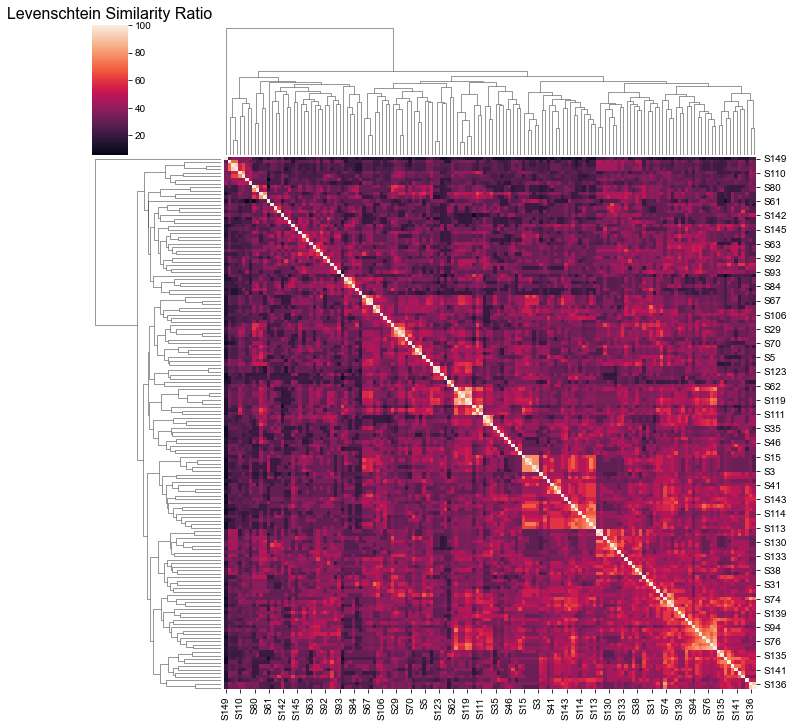

<Figure size 432x288 with 0 Axes>

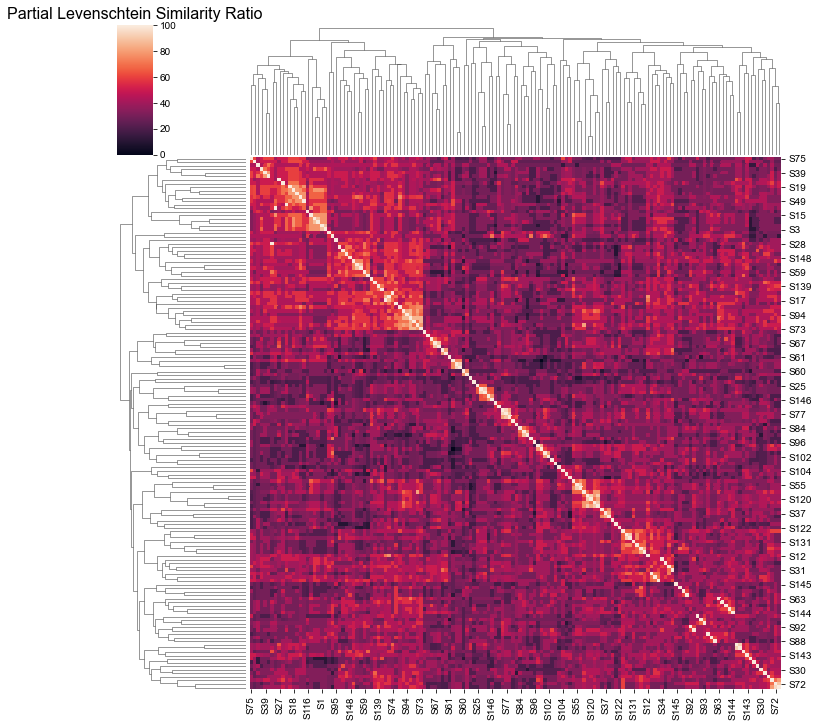

In [6]:
# Generate pairwise similarity matrix between all peptides of interest
subs = data.database.iloc[:, 0].to_list()  
seqs = data.database['Sequence'].to_list()

sim_m, sim_par_m = paa.substrate.similarity_matrix(subs, seqs)


# Search.py


In [4]:
paa.protease.classify_protease('MMP13')

'Metallo'

In [4]:
paa.protease.species_to_species('Human', 'Mouse', 'MMP13')


'Mmp13'

In [5]:
paa.protease.species_to_species('Human', 'Mouse', 'MMP6')

Please enter valid protease for Human
